In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.shape

(10000, 14)

<ipython-input-26-cc6523166f54>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Exited', palette='viridis')


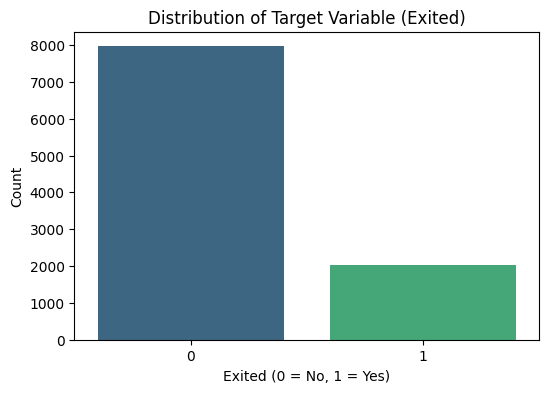

In [ ]:
#1) Target Variable Distribution (Churn Rate)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Exited', palette='viridis')
plt.title("Distribution of Target Variable (Exited)")
plt.xlabel("Exited (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

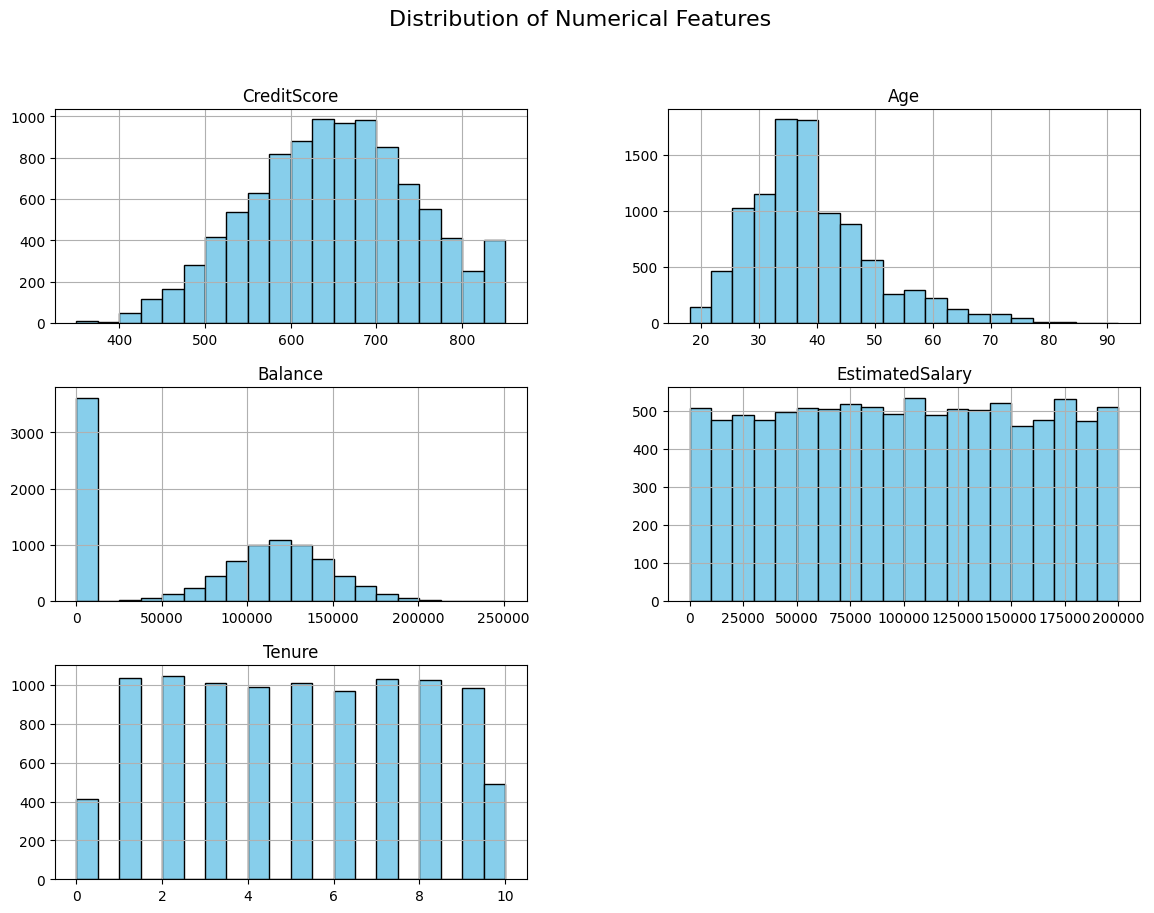

In [ ]:
# 2. Feature Distributions
# Plotting histograms for key numerical features
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure']
df[numerical_features].hist(bins=20, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

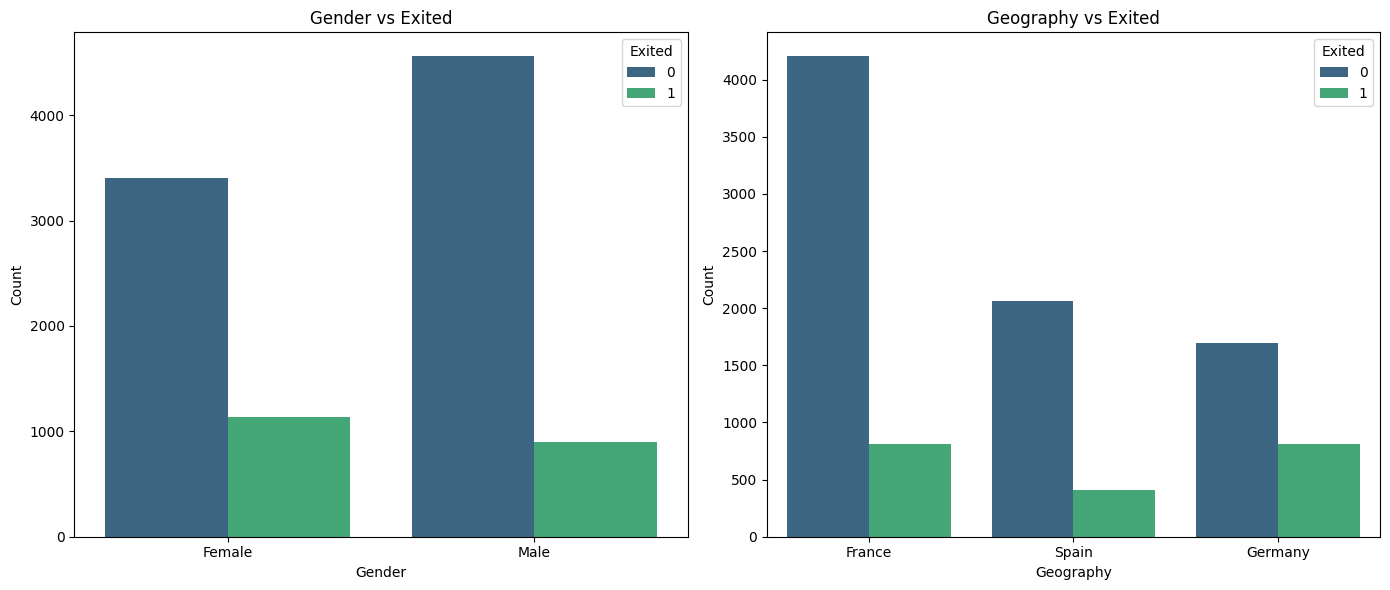

In [ ]:
# 4. Relationship of Categorical Variables with Churn (Exited)
plt.figure(figsize=(14, 6))

# Gender vs Churn
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Gender', hue='Exited', palette='viridis')
plt.title("Gender vs Exited")
plt.xlabel("Gender")
plt.ylabel("Count")

# Geography vs Churn
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Geography', hue='Exited', palette='viridis')
plt.title("Geography vs Exited")
plt.xlabel("Geography")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [ ]:
#Checking for NULL values
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
#Label Encoding
lab = LabelEncoder()
df['Geography'] = lab.fit_transform(df['Geography'])
df['Gender'] = lab.fit_transform(df['Gender'])

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Feature Selection
df.drop(['Surname','RowNumber','CustomerId'],axis=1,inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
x=df.drop('Exited',axis=1)
y=df['Exited']
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

In [ ]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
493           531          0       0   47       6       0.00              1   
6839          724          1       1   36       6   94615.11              2   
170           484          0       0   29       4  130114.39              1   
4958          655          0       1   37       6  109093.41              2   
4271          465          0       1   33       5       0.00              2   
...           ...        ...     ...  ...     ...        ...            ...   
6727          745          0       0   36       9       0.00              1   
4674          850          1       1   41       1  176958.46              2   
6399          601          1       1   48       9  163630.76              1   
872           722          0       0   35       2  163943.89              2   
8389          743          2       1   25       6       0.00              2   

      HasCrCard  IsActiveMember  EstimatedSalary  


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#SVM Model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# SVM with GridSearchCV
param_grid_svm = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}
svm = SVC()
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(x_train_scaled, y_train)

# Best model
best_svm = grid_search_svm.best_estimator_
y_pred = best_svm.predict(x_test_scaled)

print("Using SVM model .......")
print("Best Parameters for SVM:", grid_search_svm.best_params_)
print("Best Cross-Validation Score for SVM:", grid_search_svm.best_score_)
print(f"Accuracy of SVM model is {accuracy_score(y_test, y_pred) * 100:.2f}%")

# Function to predict for a new user with input validation
def predict_new_user():
    # Get user inputs for the features with validation
    while True:
        try:
            credit_score = float(input("Enter Credit Score: "))
            break  # Exit loop if valid
        except ValueError:
            print("Invalid input! Please enter a numeric value for Credit Score.")

    while True:
        try:
            age = float(input("Enter Age: "))
            break
        except ValueError:
            print("Invalid input! Please enter a numeric value for Age.")

    while True:
        try:
            balance = float(input("Enter Balance: "))
            break
        except ValueError:
            print("Invalid input! Please enter a numeric value for Balance.")

    while True:
        try:
            estimated_salary = float(input("Enter Estimated Salary: "))
            break
        except ValueError:
            print("Invalid input! Please enter a numeric value for Estimated Salary.")

    while True:
        try:
            tenure = float(input("Enter Tenure: "))
            break
        except ValueError:
            print("Invalid input! Please enter a numeric value for Tenure.")

    # Geography input validation (only 0, 1, or 2)
    while True:
        try:
            geography = int(input("Enter Geography (France = 0, Spain = 1, Germany = 2): "))
            if geography in [0, 1, 2]:
                break
            else:
                print("Invalid input! Please enter 0 for France, 1 for Spain, or 2 for Germany.")
        except ValueError:
            print("Invalid input! Please enter a valid integer value for Geography.")

    # Gender input validation (only 0 or 1)
    while True:
        try:
            gender = int(input("Enter Gender (Male = 0, Female = 1): "))
            if gender in [0, 1]:
                break
            else:
                print("Invalid input! Please enter 0 for Male or 1 for Female.")
        except ValueError:
            print("Invalid input! Please enter a valid integer value for Gender.")

    # Has Credit Card validation (only 0 or 1)
    while True:
        try:
            has_cr_card = int(input("Does the customer have a credit card? (Yes = 1, No = 0): "))
            if has_cr_card in [0, 1]:
                break
            else:
                print("Invalid input! Please enter 0 for No or 1 for Yes.")
        except ValueError:
            print("Invalid input! Please enter a valid integer value for Credit Card.")

    # Active Member validation (only 0 or 1)
    while True:
        try:
            is_active_member = int(input("Is the customer an active member? (Yes = 1, No = 0): "))
            if is_active_member in [0, 1]:
                break
            else:
                print("Invalid input! Please enter 0 for No or 1 for Yes.")
        except ValueError:
            print("Invalid input! Please enter a valid integer value for Active Member.")

    # Number of Products validation (positive integer)
    while True:
        try:
            num_of_products = int(input("How many products does the customer have? "))
            if num_of_products >= 0:  # Ensure the number of products is non-negative
                break
            else:
                print("Invalid input! Please enter a non-negative number for products.")
        except ValueError:
            print("Invalid input! Please enter an integer for the number of products.")

    # Feature list in the correct order
    new_user_features = np.array([[credit_score, age, balance, estimated_salary, tenure,
                                   geography, gender, has_cr_card, is_active_member, num_of_products]])

    # Standardize the features using the same scaler
    new_user_scaled = scaler.transform(new_user_features)

    # Predict using the trained model
    prediction = best_svm.predict(new_user_scaled)

    if prediction == 0:
        print("Prediction: Will Not Exit (The customer will stay)")
    else:
        print("Prediction: Exited (The customer will churn)")

# Call the function to predict for a new user
predict_new_user()

NameError: name 'x_train_scaled' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Predicting test set labels using the best SVM model
y_pred = best_svm.predict(x_test_scaled)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision * 100:.2f}%")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall * 100:.2f}%")

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1 * 100:.2f}%")

Confusion Matrix:
[[1559   34]
 [ 268  139]]

Accuracy: 84.90%
Precision: 80.35%
Recall: 34.15%
F1-Score: 47.93%


In [ ]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# StandardScaler to normalize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# KNN with GridSearchCV
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11]
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_scaled, y_train)

# Best model
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(x_test_scaled)

print("Using KNN model .......")
print("Best Parameters for KNN:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
print(f"Accuracy of KNN model is {accuracy_score(y_test, y_pred) * 100:.2f}%")

# Function to predict for a new user with input validation
def predict_new_user_knn():
    # Get user inputs for the features with validation
    while True:
        try:
            credit_score = float(input("Enter Credit Score: "))
            break
        except ValueError:
            print("Invalid input! Please enter a numeric value for Credit Score.")

    while True:
        try:
            age = float(input("Enter Age: "))
            break
        except ValueError:
            print("Invalid input! Please enter a numeric value for Age.")

    while True:
        try:
            balance = float(input("Enter Balance: "))
            break
        except ValueError:
            print("Invalid input! Please enter a numeric value for Balance.")

    while True:
        try:
            estimated_salary = float(input("Enter Estimated Salary: "))
            break
        except ValueError:
            print("Invalid input! Please enter a numeric value for Estimated Salary.")

    while True:
        try:
            tenure = float(input("Enter Tenure: "))
            break
        except ValueError:
            print("Invalid input! Please enter a numeric value for Tenure.")

    # Geography input validation (only 0, 1, or 2)
    while True:
        geography = int(input("Enter Geography (France = 0, Spain = 1, Germany = 2): "))
        if geography in [0, 1, 2]:
            break
        else:
            print("Invalid input! Please enter 0 for France, 1 for Spain, or 2 for Germany.")

    # Gender input validation (only 0 or 1)
    while True:
        gender = int(input("Enter Gender (Male = 0, Female = 1): "))
        if gender in [0, 1]:
            break
        else:
            print("Invalid input! Please enter 0 for Male or 1 for Female.")

    # Has Credit Card validation (only 0 or 1)
    while True:
        has_cr_card = int(input("Does the customer have a credit card? (Yes = 1, No = 0): "))
        if has_cr_card in [0, 1]:
            break
        else:
            print("Invalid input! Please enter 0 for No or 1 for Yes.")

    # Active Member validation (only 0 or 1)
    while True:
        is_active_member = int(input("Is the customer an active member? (Yes = 1, No = 0): "))
        if is_active_member in [0, 1]:
            break
        else:
            print("Invalid input! Please enter 0 for No or 1 for Yes.")

    # Number of Products validation (positive integer)
    while True:
        try:
            num_of_products = int(input("How many products does the customer have? "))
            if num_of_products >= 0:
                break
            else:
                print("Invalid input! Please enter a non-negative number for products.")
        except ValueError:
            print("Invalid input! Please enter an integer for the number of products.")

    # Create a DataFrame for the new user
    feature_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure',
                       'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'NumOfProducts']
    new_user = pd.DataFrame({
        'CreditScore': [credit_score],
        'Age': [age],
        'Balance': [balance],
        'EstimatedSalary': [estimated_salary],
        'Tenure': [tenure],
        'Geography': [geography],
        'Gender': [gender],
        'HasCrCard': [has_cr_card],
        'IsActiveMember': [is_active_member],
        'NumOfProducts': [num_of_products]
    }, columns=feature_columns)  # Ensures the order of columns matches training data

    # Standardize the features using the same scaler
    new_user_scaled = scaler.transform(new_user)

    # Predict using the trained model
    prediction = best_knn.predict(new_user_scaled)

    if prediction == 0:
        print("Prediction: Will Not Exit (The customer will stay)")
    else:
        print("Prediction: Exited (The customer will churn)")

# Call the function to predict for a new user
predict_new_user_knn()

Using KNN model .......
Best Parameters for KNN: {'n_neighbors': 9}
Best Cross-Validation Score: 0.834625
Accuracy of KNN model is 84.00%
Enter Credit Score: 568
Enter Age: 24
Enter Balance: 76890
Enter Estimated Salary: 18000
Enter Tenure: 2
Enter Geography (France = 0, Spain = 1, Germany = 2): 0
Enter Gender (Male = 0, Female = 1): 2
Invalid input! Please enter 0 for Male or 1 for Female.
Enter Gender (Male = 0, Female = 1): 0
Does the customer have a credit card? (Yes = 1, No = 0): 0
Is the customer an active member? (Yes = 1, No = 0): 0
How many products does the customer have? 1
Prediction: Will Not Exit (The customer will stay)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Predicting test set labels using the best KNN model
y_pred_knn = best_knn.predict(x_test_scaled)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix for KNN:")
print(conf_matrix_knn)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"\nAccuracy: {accuracy_knn * 100:.2f}%")

precision_knn = precision_score(y_test, y_pred_knn)
print(f"Precision: {precision_knn * 100:.2f}%")

recall_knn = recall_score(y_test, y_pred_knn)
print(f"Recall: {recall_knn * 100:.2f}%")

f1_knn = f1_score(y_test, y_pred_knn)
print(f"F1-Score: {f1_knn * 100:.2f}%")

Confusion Matrix for KNN:
[[1543   50]
 [ 270  137]]

Accuracy: 84.00%
Precision: 73.26%
Recall: 33.66%
F1-Score: 46.13%


In [ ]:
#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import StandardScaler

# StandardScaler to normalize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Decision Tree with GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10]
}
decision_tree = DecisionTreeClassifier(random_state=0)
grid_search_dt = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(x_train_scaled, y_train)

# Best model
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(x_test_scaled)

# Results
print("Using Decision Tree .......")
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best Cross-Validation Score for Decision Tree:", grid_search_dt.best_score_)
print(f"Accuracy of Decision Tree model is {accuracy_score(y_test, y_pred_dt) * 100:.2f}%")

# Function to predict for a new user with input validation
def predict_new_user_dt():
    # Get user inputs for the features with validation
    while True:
        try:
            credit_score = float(input("Enter Credit Score: "))
            break
        except ValueError:
            print("Invalid input! Please enter a numeric value for Credit Score.")

    while True:
        try:
            age = float(input("Enter Age: "))
            break
        except ValueError:
            print("Invalid input! Please enter a numeric value for Age.")

    while True:
        try:
            balance = float(input("Enter Balance: "))
            break
        except ValueError:
            print("Invalid input! Please enter a numeric value for Balance.")

    while True:
        try:
            estimated_salary = float(input("Enter Estimated Salary: "))
            break
        except ValueError:
            print("Invalid input! Please enter a numeric value for Estimated Salary.")

    while True:
        try:
            tenure = float(input("Enter Tenure: "))
            break
        except ValueError:
            print("Invalid input! Please enter a numeric value for Tenure.")

    # Geography input validation (only 0, 1, or 2)
    while True:
        geography = int(input("Enter Geography (France = 0, Spain = 1, Germany = 2): "))
        if geography in [0, 1, 2]:
            break
        else:
            print("Invalid input! Please enter 0 for France, 1 for Spain, or 2 for Germany.")

    # Gender input validation (only 0 or 1)
    while True:
        gender = int(input("Enter Gender (Male = 0, Female = 1): "))
        if gender in [0, 1]:
            break
        else:
            print("Invalid input! Please enter 0 for Male or 1 for Female.")

    # Has Credit Card validation (only 0 or 1)
    while True:
        has_cr_card = int(input("Does the customer have a credit card? (Yes = 1, No = 0): "))
        if has_cr_card in [0, 1]:
            break
        else:
            print("Invalid input! Please enter 0 for No or 1 for Yes.")

    # Active Member validation (only 0 or 1)
    while True:
        is_active_member = int(input("Is the customer an active member? (Yes = 1, No = 0): "))
        if is_active_member in [0, 1]:
            break
        else:
            print("Invalid input! Please enter 0 for No or 1 for Yes.")

    # Number of Products validation (positive integer)
    while True:
        try:
            num_of_products = int(input("How many products does the customer have? "))
            if num_of_products >= 0:
                break
            else:
                print("Invalid input! Please enter a non-negative number for products.")
        except ValueError:
            print("Invalid input! Please enter an integer for the number of products.")

    # Create a DataFrame for the new user
    feature_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure',
                       'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'NumOfProducts']
    new_user = pd.DataFrame({
        'CreditScore': [credit_score],
        'Age': [age],
        'Balance': [balance],
        'EstimatedSalary': [estimated_salary],
        'Tenure': [tenure],
        'Geography': [geography],
        'Gender': [gender],
        'HasCrCard': [has_cr_card],
        'IsActiveMember': [is_active_member],
        'NumOfProducts': [num_of_products]
    }, columns=feature_columns)  # Ensures the order of columns matches training data

    # Standardize the features using the same scaler
    new_user_scaled = scaler.transform(new_user)

    # Predict using the trained model
    prediction = best_dt.predict(new_user_scaled)

    if prediction == 0:
        print("Prediction: Will Not Exit (The customer will stay)")
    else:
        print("Prediction: Exited (The customer will churn)")

# Call the function to predict for a new user
predict_new_user_dt()

Using Decision Tree .......
Best Parameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 2}
Best Cross-Validation Score for Decision Tree: 0.8532499999999998
Accuracy of Decision Tree model is 85.05%
Enter Credit Score: 356
Enter Age: 29
Enter Balance: 357689
Enter Estimated Salary: 40000
Enter Tenure: 7
Enter Geography (France = 0, Spain = 1, Germany = 2): 1
Enter Gender (Male = 0, Female = 1): 0
Does the customer have a credit card? (Yes = 1, No = 0): 1
Is the customer an active member? (Yes = 1, No = 0): 0
How many products does the customer have? 0
Prediction: Will Not Exit (The customer will stay)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Predicting test set labels using the best Decision Tree model
y_pred_dt = best_dt.predict(x_test_scaled)

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix for Decision Tree:")
print(conf_matrix_dt)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"\nAccuracy: {accuracy_dt * 100:.2f}%")

precision_dt = precision_score(y_test, y_pred_dt)
print(f"Precision: {precision_dt * 100:.2f}%")

recall_dt = recall_score(y_test, y_pred_dt)
print(f"Recall: {recall_dt * 100:.2f}%")

f1_dt = f1_score(y_test, y_pred_dt)
print(f"F1-Score: {f1_dt * 100:.2f}%")

Confusion Matrix for Decision Tree:
[[1556   37]
 [ 262  145]]

Accuracy: 85.05%
Precision: 79.67%
Recall: 35.63%
F1-Score: 49.24%


In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# StandardScaler to normalize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# ANN Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train_scaled, y_train, epochs=100, batch_size=5, verbose=1)

# Predicting test set labels
y_pred_prob = model.predict(x_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Results
accuracy = accuracy_score(y_test, y_pred)
print("Using ANN model .......")
print(f"Accuracy of the model is {accuracy * 100:.2f}%")

# Function to predict for a new user with input validation
def predict_new_user_ann():
    # Get user inputs for the features with validation
    while True:
        try:
            credit_score = float(input("Enter Credit Score: "))
            break
        except ValueError:
            print("Invalid input! Please enter a numeric value for Credit Score.")

    while True:
        try:
            age = float(input("Enter Age: "))
            break
        except ValueError:
            print("Invalid input! Please enter a numeric value for Age.")

    while True:
        try:
            balance = float(input("Enter Balance: "))
            break
        except ValueError:
            print("Invalid input! Please enter a numeric value for Balance.")

    while True:
        try:
            estimated_salary = float(input("Enter Estimated Salary: "))
            break
        except ValueError:
            print("Invalid input! Please enter a numeric value for Estimated Salary.")

    while True:
        try:
            tenure = float(input("Enter Tenure: "))
            break
        except ValueError:
            print("Invalid input! Please enter a numeric value for Tenure.")

    # Geography input validation (only 0, 1, or 2)
    while True:
        geography = int(input("Enter Geography (France = 0, Spain = 1, Germany = 2): "))
        if geography in [0, 1, 2]:
            break
        else:
            print("Invalid input! Please enter 0 for France, 1 for Spain, or 2 for Germany.")

    # Gender input validation (only 0 or 1)
    while True:
        gender = int(input("Enter Gender (Male = 0, Female = 1): "))
        if gender in [0, 1]:
            break
        else:
            print("Invalid input! Please enter 0 for Male or 1 for Female.")

    # Has Credit Card validation (only 0 or 1)
    while True:
        has_cr_card = int(input("Does the customer have a credit card? (Yes = 1, No = 0): "))
        if has_cr_card in [0, 1]:
            break
        else:
            print("Invalid input! Please enter 0 for No or 1 for Yes.")

    # Active Member validation (only 0 or 1)
    while True:
        is_active_member = int(input("Is the customer an active member? (Yes = 1, No = 0): "))
        if is_active_member in [0, 1]:
            break
        else:
            print("Invalid input! Please enter 0 for No or 1 for Yes.")

    # Number of Products validation (positive integer)
    while True:
        try:
            num_of_products = int(input("How many products does the customer have? "))
            if num_of_products >= 0:
                break
            else:
                print("Invalid input! Please enter a non-negative number for products.")
        except ValueError:
            print("Invalid input! Please enter an integer for the number of products.")

    # Create a DataFrame for the new user
    feature_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure',
                       'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'NumOfProducts']
    new_user = pd.DataFrame({
        'CreditScore': [credit_score],
        'Age': [age],
        'Balance': [balance],
        'EstimatedSalary': [estimated_salary],
        'Tenure': [tenure],
        'Geography': [geography],
        'Gender': [gender],
        'HasCrCard': [has_cr_card],
        'IsActiveMember': [is_active_member],
        'NumOfProducts': [num_of_products]
    }, columns=feature_columns)  # Ensures the order of columns matches training data

    # Standardize the features using the same scaler
    new_user_scaled = scaler.transform(new_user)

    # Predict using the trained model
    prediction_prob = model.predict(new_user_scaled)
    prediction = (prediction_prob > 0.5).astype(int)

    if prediction == 0:
        print("Prediction: Will Not Exit (The customer will stay)")
    else:
        print("Prediction: Exited (The customer will churn)")

# Call the function to predict for a new user
predict_new_user_ann()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7119 - loss: 0.5562
Epoch 2/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8313 - loss: 0.4067
Epoch 3/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8326 - loss: 0.3937
Epoch 4/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8477 - loss: 0.3785
Epoch 5/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8523 - loss: 0.3738
Epoch 6/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8533 - loss: 0.3653
Epoch 7/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8567 - loss: 0.3523
Epoch 8/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8538 - loss: 0.3542
Epoch 9/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8609 - loss: 0.3505
Epoch 10/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8540 - loss: 0.3560
Epoch 11/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8599 - loss: 0.3455
Epoch 12/100
1600/1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Predicting test set labels using the ANN model
y_pred_ann = (model.predict(x_test_scaled) > 0.5).astype(int)

conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)
print("Confusion Matrix for ANN:")
print(conf_matrix_ann)

accuracy_ann = accuracy_score(y_test, y_pred_ann)
print(f"\nAccuracy: {accuracy_ann * 100:.2f}%")

precision_ann = precision_score(y_test, y_pred_ann)
print(f"Precision: {precision_ann * 100:.2f}%")

recall_ann = recall_score(y_test, y_pred_ann)
print(f"Recall: {recall_ann * 100:.2f}%")

f1_ann = f1_score(y_test, y_pred_ann)
print(f"F1-Score: {f1_ann * 100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix for ANN:
[[1513   80]
 [ 209  198]]

Accuracy: 85.55%
Precision: 71.22%
Recall: 48.65%
F1-Score: 57.81%
